In [4]:
import numpy as np
import math
import cv2
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import tools
import pandas as pd
import sys


from ipywidgets import interact, fixed

def normalize_image(img):
    img = img.astype(float)
    return ( img - np.min(img)) / ( np.max(img) - np.min(img))

def normL1(imgX, imgY):
    return np.abs(imgX) + np.abs(imgY)

def normL2(imgX, imgY):
    return np.sqrt( imgX * imgX + imgY * imgY)

# Median blur + contrast augmentation + image uniformization

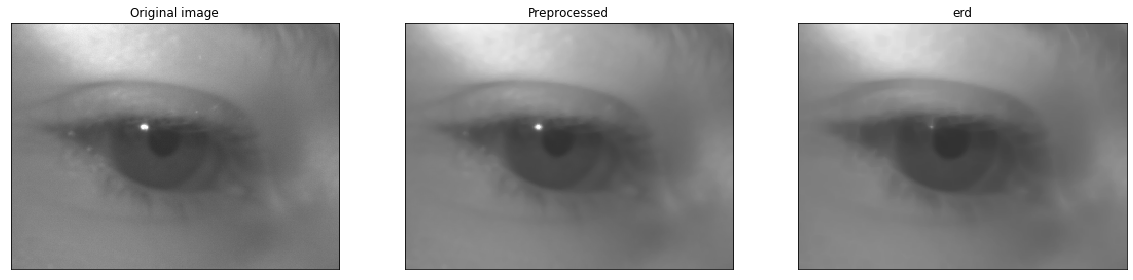

In [23]:
image_path = '../../train/images/input/elps_eye_16.png'
img = cv2.imread(image_path)

def apply_contrast(input_img, contrast = 0):
#source : https://stackoverflow.com/questions/39308030/how-do-i-increase-the-contrast-of-an-image-in-python-opencv
    buf = input_img.copy()
    if contrast != 0:
        f = 131*(contrast + 127)/(127*(131-contrast))
        alpha_c = f
        gamma_c = 127*(1-f)
        
        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

    return buf


def local_normalize_image(img, ksize=30):
    # Compute the local background and foreground for the image
    kernel = np.ones( ( ksize, ksize), np.uint8)
    
    if ksize % 2 == 0:
        ksize -= 1

    img_erd = cv2.GaussianBlur( cv2.erode( img, kernel, iterations = 1).astype( float), (ksize, ksize), 0)
    img_dlt = cv2.GaussianBlur( cv2.dilate( img, kernel, iterations = 1).astype( float), (ksize, ksize), 0)
    
    return tools.saturate_cast_uint8( ( img - img_erd) * 255.0 / ( img_dlt - img_erd + 1))



median_kernel = 5
ksize=5
if ksize % 2 == 0:
    ksize -= 1
kernel = np.ones( ( ksize, ksize), np.uint8)
img_blur = cv2.medianBlur(img, median_kernel)
img_erd = cv2.erode( img_blur, kernel, iterations = 1)
c = 15
#img_contrast = apply_contrast(img_blur, c)
ksize = 75
#img_unif = local_normalize_image(img_contrast, ksize)

tools.multiPlot( 1, 3, ( img, img_blur, img_erd),
                     ( 'Original image', 'Preprocessed', 'erd'),
                     cmap_tuple=( cm.gray, cm.gray, cm.gray))
